In [11]:
import numpy
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

########part a########

f = numpy.load("science2k-doc-word.npy")

print(f.shape[0], f.shape[1])

sum_squared_distance = []
for k in range(1, 31):
    k_means = KMeans(n_clusters = k)
    km = k_means.fit(f)
    sum_squared_distance.append(km.inertia_)
    
print(sum_squared_distance)

1373 5476
[34736463.44521062, 33778619.676719844, 32999029.959047403, 32732262.852659393, 32480977.867675062, 32282016.546000656, 32250354.738807872, 32058210.203054562, 31981876.806730095, 31871406.509295795, 31909782.76902274, 31616610.208726875, 31710335.385783974, 31587405.2620102, 31395813.702765517, 31464920.38933022, 31356639.196468838, 31280545.454492062, 31325621.34513247, 31156788.216389764, 31135566.037115686, 31101966.833688527, 31054316.049864087, 31037030.86580181, 30929885.878337596, 30775926.60378831, 30766715.368076533, 30780396.47348959, 30751123.519407604, 30622917.003199548]


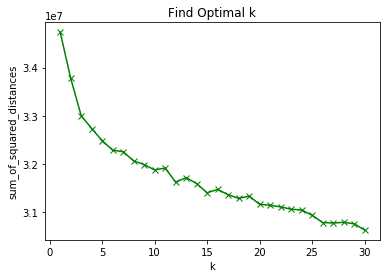

In [12]:
plt.plot(range(1,31,1), sum_squared_distance, 'gx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Find Optimal k')
plt.show()

In [52]:
#choose k to be 15
k_15 = KMeans(n_clusters = 15).fit(f)
centroids = k_15.cluster_centers_
print(centroids)

[[10.7515      8.759128    9.269927   ... -0.8567443  -0.8567443
  -0.8567443 ]
 [10.15987413  0.44910687  9.10820842 ... -0.75227233 -0.82507056
  -0.06916538]
 [11.01663     8.47772     9.681646   ... -1.138152   -1.138152
  -1.138152  ]
 ...
 [10.43250729  3.85901697  9.26007368 ... -0.63937213 -1.05485472
  -1.05485472]
 [ 8.98039421  9.57742607  9.09222285 ... -0.81300833 -1.11987715
  -1.11987715]
 [ 9.14767158 -0.30445498  9.0869244  ... -0.68164294 -0.68164294
  -0.68164294]]


In [38]:
with open('science2k-titles.txt') as f1:
    ttl = f1.read().splitlines() 
with open('science2k-vocab.txt') as f2:
    wd = f2.read().splitlines() 

In [44]:
x_bar = []
for j in range(f.shape[1]):
    tot = 0
    for i in range(f.shape[0]):
        tot = tot + f[i][j]
    avg = tot/f.shape[0]
    x_bar.append(avg)

In [62]:
#find top 10 word within each cluster
top10wd = []
for i in range(15):
    per_doc_diff = []
    for j in range(5476):
        d = centroids[i][j] - x_bar[j]
        per_doc_diff.append(abs(d)) 
    the_top = sorted(range(len(per_doc_diff)), key = lambda sub: per_doc_diff[sub])[-10:]
    top10wd.append(the_top)
  
for i in range(15):
    print()
    print('Cluster no.' + str(i + 1))
    for j in range(10):
        tmp1 = top10wd[i][j]
        imp_wd = wd[tmp1]
        print(imp_wd)



Cluster no.1
axial
mutation
helix
mutant
anterior
orange
embryos
dorsal
zebrafish
grl

Cluster no.2
transition
constant
dependence
measured
density
measurements
temperature
electron
theoretical
energy

Cluster no.3
nr1
cargo
mab
vesicle
microtubule
motor
anti
vesicles
mlin
kif17

Cluster no.4
large
reports
activity
fig
control
years
protein
expression
cell
cells

Cluster no.5
geophys
temperature
values
depth
estimates
ocean
north
global
variations
surface

Cluster no.6
years
last
get
people
year
just
scientists
fig
researchers
says

Cluster no.7
expressed
hours
binding
min
induced
antibody
expression
cell
protein
cells

Cluster no.8
phylogenetic
analysis
dna
genes
table
gene
genetics
sequence
sequences
genome

Cluster no.9
mortality
nuclear
designs
paper
doe
spent
proliferation
plutonium
fuel
weapons

Cluster no.10
function
respectively
three
correspondence
start
observed
reports
shown
mail
fig

Cluster no.11
genes
detected
pcr
wild
sequences
expression
dna
protein
sequence
gene

Clus

In [56]:
kmean_15 = KMeans(n_clusters = 15).fit_transform(f)
label_15 = k_15.labels_
print(label_15)
print(kmean_15[2])

[ 9  9  9 ...  3 11 11]
[210.30324497 128.74520736 147.10515563 120.01199863 145.05581363
 136.85272922 179.06523242 138.81246741 155.07170481 224.88701706
 181.5742904  170.41157554 140.312805   144.36298785 133.13304542]


In [32]:
print(len(label_15))
print(len(kmean_15))

1373
1373


In [63]:
#find closet top 10 files within each cluster
   
dist_to_centroids = {}
for i in range(f.shape[0]):
    label = label_15[i]
    dist = kmean_15[i][label]
    if label not in dist_to_centroids:
        dist_to_centroids[label] = []
    dist_to_centroids[label].append((i,dist))
    
for i in range(15):
    print()
    print("Top documents from cluster " + str(i+1))
    top_ttl = sorted(dist_to_centroids[i], key=lambda x:x[1])[:10]
    for a in top_ttl:
        print(ttl[a[0]])    
    


Top documents from cluster 1
"Gridlock, an HLH Gene Required for Assembly of the Aorta in Zebrafish"

Top documents from cluster 2
"A Quantum State-Resolved Insertion Reaction: <latex>$O(^{1}D) + H_{2} (J = 0) \rightarrow OH(^{2}\prod, v, N) + H(^{2}S)$</latex>"
"Ultrafast Electron Localization Dynamics Following Photo-Induced Charge Transfer"
"Optical Gain and Stimulated Emission in Nanocrystal Quantum Dots"
"Quantum-Critical Conductivity Scaling for a Metal-Insulator Transition"
"Real-Space Imaging of Two-Dimensional Antiferromagnetism on the Atomic Scale"
"Electronic Structure of Mott Insulators Studied by Inelastic X-ray Scattering"
"Formation of Cyclic Water Hexamer in Liquid Helium: The Smallest Piece of Ice"
"Imaging Coherent Electron Flow from a Quantum Point Contact"
"First-Principles Theory for the <latex>$H + H_2O$</latex>, <latex>$D_2O$</latex> Reactions"
"Dynamically Controlled Protein Tunneling Paths in Photosynthetic Reaction Centers"

Top documents from cluster 3
"Kine

In [65]:
##########part b########

ff = numpy.load("science2k-word-doc.npy")

print(ff.shape[0], ff.shape[1])

ssd = []
for k in range(1, 31):
    k_means = KMeans(n_clusters = k)
    km = k_means.fit(ff)
    ssd.append(km.inertia_)   
print(ssd)


5476 1373
[34736463.49111529, 34024780.07152506, 33545339.937730946, 33202821.992139094, 33043744.94820075, 33083130.835923605, 32789955.582531337, 32828664.603541903, 32554773.088369265, 32531289.847432625, 32498492.855997182, 32486142.435900178, 32479338.547566105, 32450548.860802118, 32551472.553646833, 32351421.779384736, 32365320.3246748, 32224310.029570658, 32227913.032691274, 32256164.825767234, 32106112.565046955, 32256175.662561957, 31961798.701247696, 32027586.81151615, 32103913.11796106, 31905860.41497627, 31964827.553649943, 31867234.945632562, 31929866.46904016, 31787701.61502959]


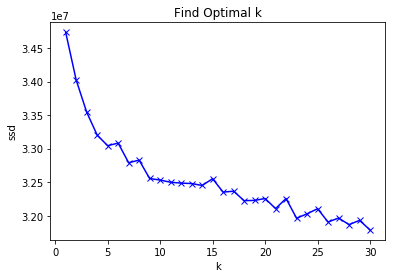

In [66]:
plt.plot(range(1,31,1), ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('ssd')
plt.title('Find Optimal k')
plt.show()

In [67]:
#Still choose k to be 15
k_15_tp = KMeans(n_clusters = 15).fit(ff)
centroids_of_tp = k_15_tp.cluster_centers_
print(centroids_of_tp)

[[-0.8492733  -0.8492733  -0.8492733  ... -0.8492733  -0.8492733
  -0.8492733 ]
 [ 1.27737463  1.80720222  0.69603407 ... -0.59312489 -0.27084052
   0.17705816]
 [-0.82829719 -0.63703973 -0.52902525 ...  0.16246289  0.34270908
   0.06948523]
 ...
 [-0.19661209 -0.19414596 -0.12602379 ...  0.112276    0.19125072
   0.19982614]
 [-1.99445717 -1.99445717  0.19264508 ...  4.0303285   0.97878042
  -0.57489167]
 [-2.53554268 -2.804513   -2.51668447 ...  3.29454781  0.97885796
  -0.67699251]]


In [69]:
print(len(centroids_of_tp[0]))

1373


In [73]:
new_bar = []
for j in range(ff.shape[1]):
    tot = 0
    for i in range(ff.shape[0]):
        tot = tot + ff[i][j]
    avg = tot/ff.shape[0]
    new_bar.append(avg)

In [74]:
#find top 10 files within each cluster

top10doc = []
for i in range(15):
    per_wd_diff = []
    for j in range(1373):
        d = centroids_of_tp[i][j] - new_bar[j]
        per_wd_diff.append(abs(d)) 
    the_top = sorted(range(len(per_wd_diff)), key = lambda sub: per_wd_diff[sub])[-10:]
    top10doc.append(the_top)
  
for i in range(15):
    print()
    print('Cluster no.' + str(i + 1))
    for j in range(10):
        tmp1 = top10doc[i][j]
        imp_wd = ttl[tmp1]
        print(imp_wd)



Cluster no.1
"Proximity Matters"
"Observation of Antiferromagnetic Domains in Epitaxial Thin Films"
"New Observational Constraints for Atmospheric Hydroxyl on Global and Hemispheric Scales"
"Orbital Physics in Transition-Metal Oxides"
"Alloying at Surfaces by the Migration of Reactive Two-Dimensional Islands"
"The Glucocorticoid Receptor: Rapid Exchange with Regulatory Sites in Living Cells"
"Evidence for the Evolution of Bdelloid Rotifers without Sexual Reproduction or Genetic Exchange"
"Taking a Very Close Look at Magnetic Structures"
"Field Measurement of Slow Metamorphic Reaction Rates at Temperatures of 500 degrees to 600 degrees C"
"Global Biodiversity Scenarios for the Year 2100"

Cluster no.2
"Soft Money's Hard Realities"
"Meltdown on Long Island"
"Designer Labs: Architecture Discovers Science"
"Creation's Seventh Day"
"I'd like to See America Used as a Global Lab"
"Ecologists on a Mission to Save the World"
"A Mouse Chronology"
"Help Needed to Rebuild Science in Yugoslavia"
"

In [75]:
kmean_15_tp = KMeans(n_clusters = 15).fit_transform(ff)
label_15_tp = k_15_tp.labels_

In [76]:
#find closet top 10 words within each cluster
   
dist_to_centroids = {}
for i in range(ff.shape[0]):
    label = label_15_tp[i]
    dist = kmean_15_tp[i][label]
    if label not in dist_to_centroids:
        dist_to_centroids[label] = []
    dist_to_centroids[label].append((i,dist))
    
for i in range(15):
    print()
    print("Top words from cluster " + str(i+1))
    top_wd = sorted(dist_to_centroids[i], key=lambda x:x[1])[:10]
    for a in top_wd:
        print(wd[a[0]])  
        


Top words from cluster 1
exchange

Top words from cluster 2
thats
going
director
big
hard
lab
look
put
came
team

Top words from cluster 3
cys
thr
stranded
phe
gly
arg
val
asn
motifs
eukaryotes

Top words from cluster 4
recalls
hes
schools
fight
weapons
prize
spending
geneticist
clinton
capital

Top words from cluster 5
clim
geochim
cosmochim
millennial
troposphere
tropospheric
interglacial
volcanism
weathering
lithosphere

Top words from cluster 6
associated

Top words from cluster 7
group

Top words from cluster 8
coefficient
finite
dynamical
momentum
approximation
dispersion
angular
nonlinear
photon
voltage

Top words from cluster 9
red

Top words from cluster 10
staining
stained
antibodies
intracellular
fluorescent
embryonic
incubated
cultured
transfected
antigen

Top words from cluster 11
appears

Top words from cluster 12
kinase
signaling
receptors
mrna
yeast
vivo
polymerase
mutants
regulated
bind

Top words from cluster 13
aptamers
dnag
lcts
proteorhodopsin
trxr
doxy
lg268
rory